# **🍽️ Restaurant Tips Analysis**

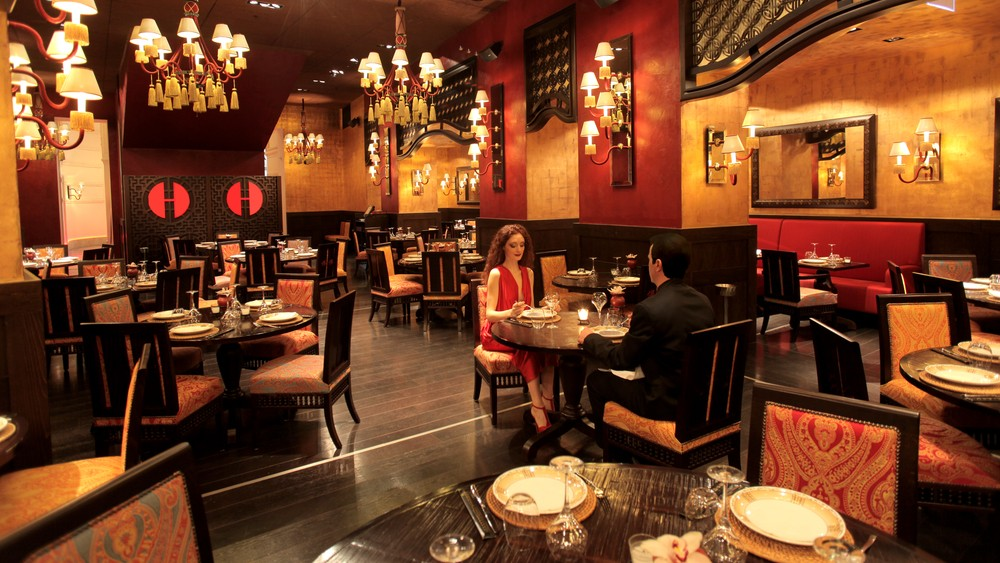

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [ ]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [ ]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

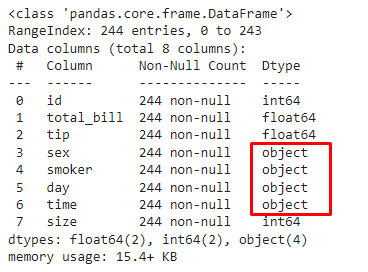

Let's fix their types and make them string:

In [ ]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [ ]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# PUT YOUR CODE HERE
smokers_df = df[df['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
69,69,15.01,2.09,Male,Yes,Sat,Dinner,2
194,194,16.58,4.0,Male,Yes,Thur,Lunch,2
173,173,31.85,3.18,Male,Yes,Sun,Dinner,2
214,214,28.17,6.5,Female,Yes,Sat,Dinner,3
177,177,14.48,2.0,Male,Yes,Sun,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df = df[df['smoker'] == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
145,145,8.35,1.5,Female,No,Thur,Lunch,2
129,129,22.82,2.18,Male,No,Thur,Lunch,3
108,108,18.24,3.76,Male,No,Sat,Dinner,2
27,27,12.69,2.0,Male,No,Sat,Dinner,2
88,88,24.71,5.85,Male,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. The mean and median for smokers (≈ 3.01 and 3.00) are both higher than those of non-smokers (≈ 2.99 and 2.74). This suggests that smokers may generally score a bit higher on the measured variable (possibly symptom severity, frequency, or another health-related metric).
2. The mean (≈ 2.99) is higher than the median (2.74) for non-smokers, which indicates a right-skew (a few higher values pulling the mean upward). For smokers, the mean and median are very close (3.01 vs. 3.00), suggesting a more symmetric distribution.

**General conclusion:**

Smokers generally report higher values than non-smokers.



#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

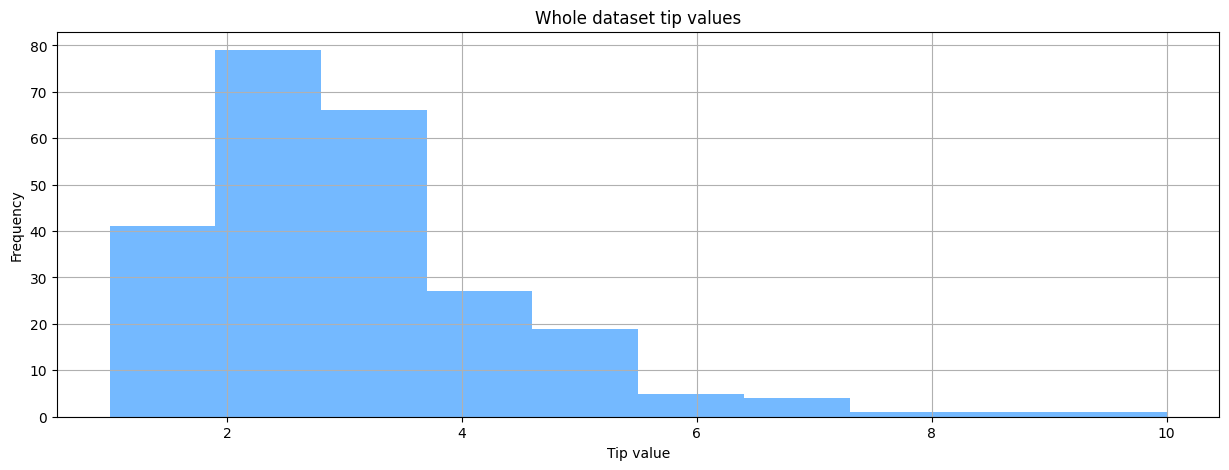

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df['tip'], color='#74b9ff', bins=10)

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

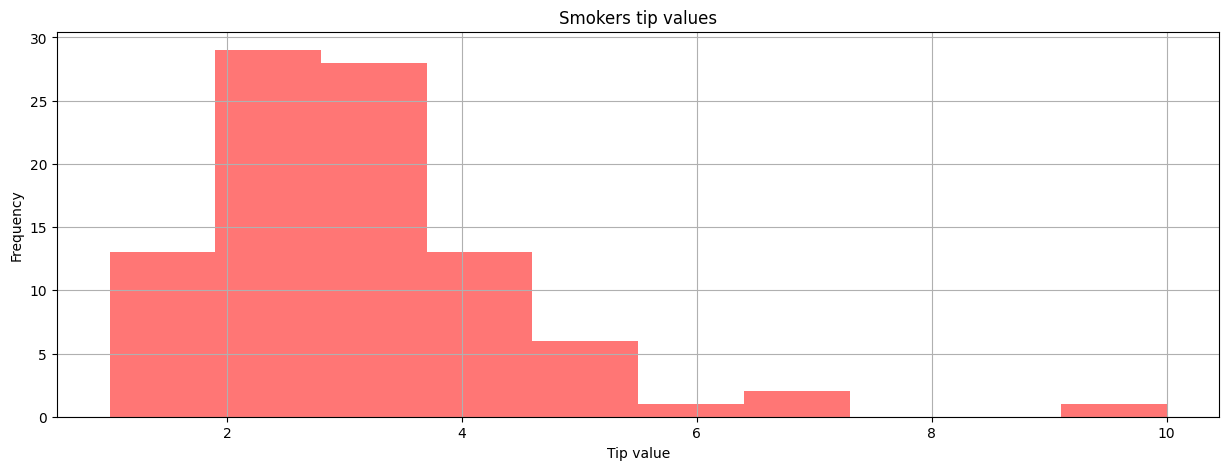

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], color='#ff7675', bins=10)

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

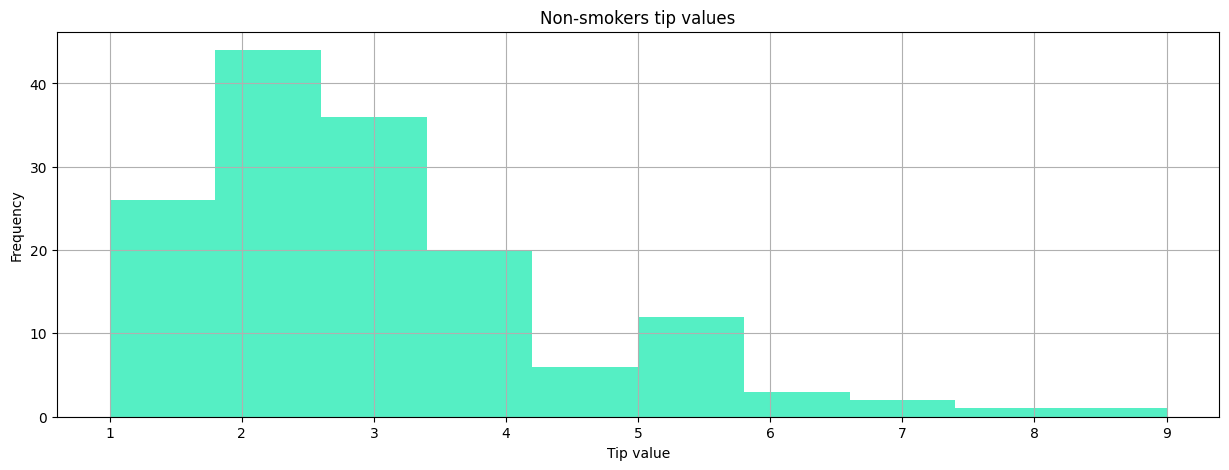

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], color='#55efc4', bins=10)

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

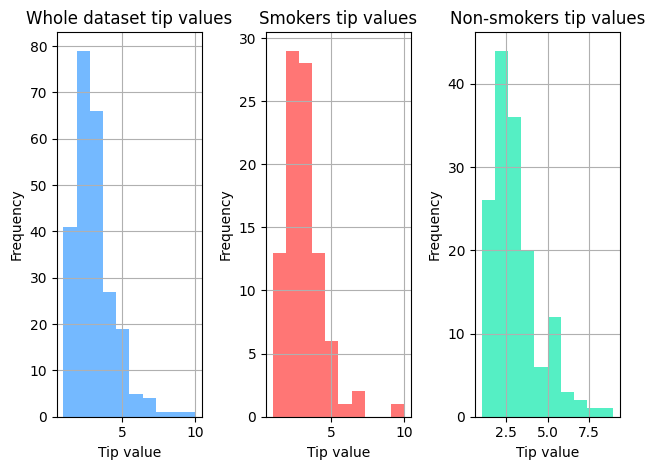

In [ ]:
# Create a single figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(6.4, 4.8))  # 640x480 in inches

# Whole dataset
axes[0].hist(df['tip'], color='#74b9ff', bins=10)
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Smokers
axes[1].hist(smokers_df['tip'], color='#ff7675', bins=10)
axes[1].set_title('Smokers tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Non-smokers
axes[2].hist(non_smokers_df['tip'], color='#55efc4', bins=10)
axes[2].set_title('Non-smokers tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Overall tip distribution

*   Most tips fall between 2 and 4 dollars in the whole dataset.
*   Very few tips go beyond 8–10 dollars, showing a strong right-skewed distribution

2. Smokers vs. Non-smokers

*   Smokers: Tips are more concentrated around 2.5–4 dollars, with fewer very low or very high tips.
*   Non-smokers: Tips are spread out a bit more, with some very low tips (near $1) and also more occurrences above 6 dollars compared to smokers.

3. Comparison


* Both groups show right-skewness (many small tips, few large ones).
* Non-smokers display a wider spread of tipping behavior (both very low and moderately high tips), while smokers seem to have a tighter cluster around the mean.
* This suggests non-smokers might be a little less predictable in tipping habits, while smokers’ tips tend to be more consistent.

**General conclusion:**
* Overall tips: Most tips fall between 2–4 dollars, with very few above 8 dollars, indicating a right-skewed distribution.
* Smokers: Tip values are more concentrated in the 2.5–4 dollar range, showing less variation and more consistency.
* Non-smokers: Tips show a wider spread, including more very low tips ≈ 1 dollar, and some moderately high tips more than 6 dollars.
* Comparison: Both groups are right-skewed, but non-smokers’ tipping behavior is more variable, while smokers’ tips are more clustered around the mean.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

In [ ]:
# Create a new dataframe male_df containing only info about male customers.
male_df = df[df['sex'] == 'Male']
male_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
206,206,26.59,3.41,Male,Yes,Sat,Dinner,3
199,199,13.51,2.0,Male,Yes,Thur,Lunch,2
59,59,48.27,6.73,Male,No,Sat,Dinner,4
49,49,18.04,3.0,Male,No,Sun,Dinner,2
77,77,27.2,4.0,Male,No,Thur,Lunch,4


In [ ]:
# Create a new dataframe male_df containing only info about female customers.
female_df = df[df['sex'] == 'Female']
female_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
100,100,11.35,2.5,Female,Yes,Fri,Dinner,2
225,225,16.27,2.5,Female,Yes,Fri,Lunch,2
188,188,18.15,3.5,Female,Yes,Sun,Dinner,3
157,157,25.0,3.75,Female,No,Sun,Dinner,4
52,52,34.81,5.2,Female,No,Sun,Dinner,4


In [ ]:
# Calculate measures of central tendency for male customers
male_tip_min = male_df['tip'].min()
male_tip_max = male_df['tip'].max()
male_tip_mean = male_df['tip'].mean()
male_tip_median = male_df['tip'].median()

# Make dataframe containing the measures of central tendency for male customers
# Make a list of values
male_values = [male_tip_min, male_tip_max, male_tip_mean, male_tip_median]
# Round all the values to 4 decimal places
male_values = map(lambda x: round(x, 4), male_values)

# Make a dataframe from the list
male_mct = pd.DataFrame(male_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
male_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


In [ ]:
# Calculate measures of central tendency for female customers
female_tip_min = female_df['tip'].min()
female_tip_max = female_df['tip'].max()
female_tip_mean = female_df['tip'].mean()
female_tip_median = female_df['tip'].median()

# Make dataframe containing the measures of central tendency for female customers
# Make a list of values
female_values = [female_tip_min, female_tip_max, female_tip_mean, female_tip_median]
# Round all the values to 4 decimal places
female_values = map(lambda x: round(x, 4), female_values)

# Make a dataframe from the list
female_mct = pd.DataFrame(female_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
female_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Male': {'min': male_tip_min, 'max': male_tip_max, 'mean': male_tip_mean, 'median': male_tip_median},
    'Female': {'min': female_tip_min, 'max': female_tip_max, 'mean': female_tip_mean, 'median': female_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Male,Female
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


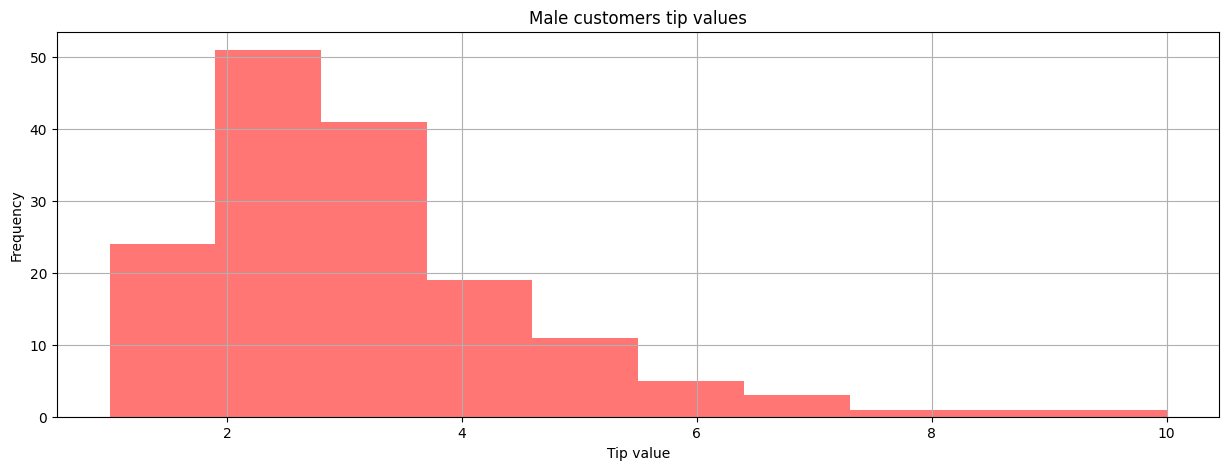

In [ ]:
# Male customers histogram
plt.figure(figsize=(15, 5))
plt.hist(male_df['tip'], color='#ff7675', bins=10)

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Male customers tip values')
plt.grid(True)
plt.show()

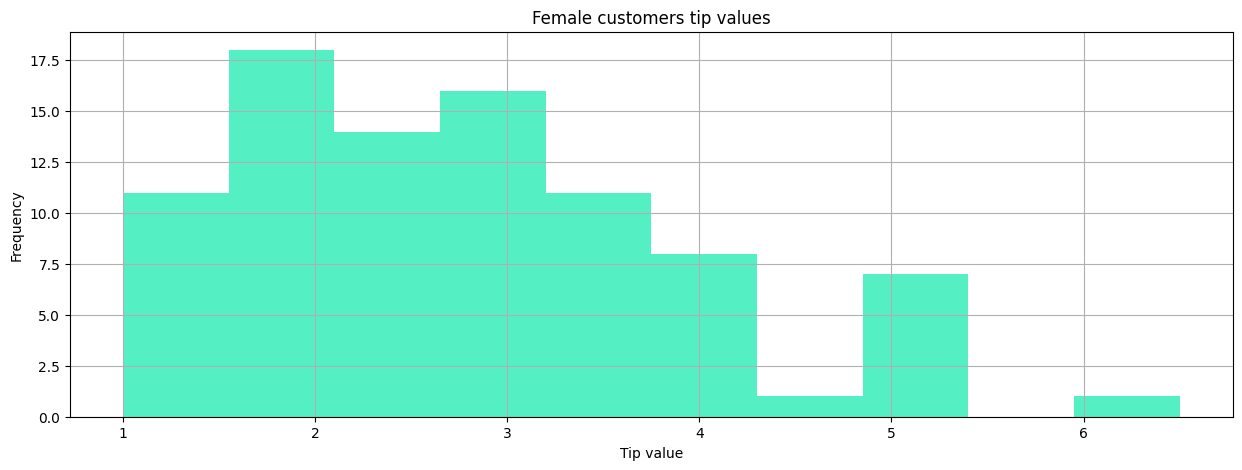

In [ ]:
# Female customers histogram
plt.figure(figsize=(15, 5))
plt.hist(female_df['tip'], color='#55efc4', bins=10)

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Female customers tip values')
plt.grid(True)
plt.show()

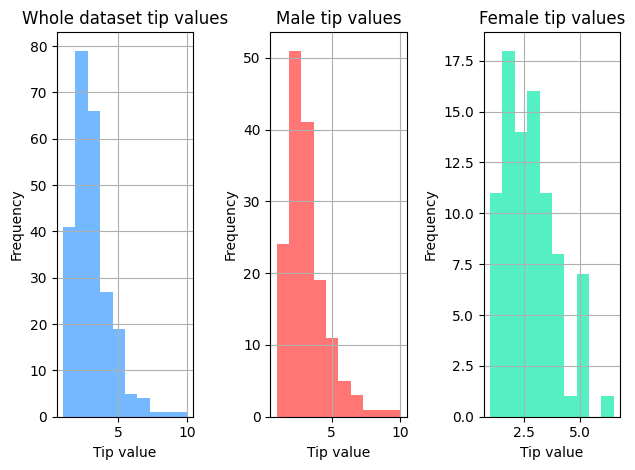

In [ ]:
# Create a single figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(6.4, 4.8))  # 640x480 in inches

# Whole dataset
axes[0].hist(df['tip'], color='#74b9ff', bins=10)
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Male customers dataset
axes[1].hist(male_df['tip'], color='#ff7675', bins=10)
axes[1].set_title('Male tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Female customers dataset
axes[2].hist(female_df['tip'], color='#55efc4', bins=10)
axes[2].set_title('Female tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

**General conclusion**

The distribution shows that male customers generally tip in a more consistent range, centered around 3–4 dollars, with occasional higher tips, while female customers display greater variability, tending to give more smaller tips (1–2 dollars) but also some higher ones. Overall, males tip slightly higher on average, whereas females show a wider spread in tipping behavior.

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

In [ ]:
# Create a new dataframe dinner_df containing only info about weekdays.
weekday_df = df[df['day'].isin(['Mon', 'Tue', 'Wed', 'Thu', 'Fri'])]
weekday_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
100,100,11.35,2.5,Female,Yes,Fri,Dinner,2
96,96,27.28,4.0,Male,Yes,Fri,Dinner,2
99,99,12.46,1.5,Male,No,Fri,Dinner,2
95,95,40.17,4.73,Male,Yes,Fri,Dinner,4
223,223,15.98,3.0,Female,No,Fri,Lunch,3


In [ ]:
# Create a new dataframe dinner_df containing only info about weekends.
weekend_df = df[df['day'].isin(['Sat', 'Sun'])]
weekend_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
116,116,29.93,5.07,Male,No,Sun,Dinner,4
228,228,13.28,2.72,Male,No,Sat,Dinner,2
151,151,13.13,2.0,Male,No,Sun,Dinner,2
185,185,20.69,5.0,Male,No,Sun,Dinner,5
177,177,14.48,2.0,Male,Yes,Sun,Dinner,2


In [ ]:
# Calculate measures of central tendency for weekdays
weekday_tip_min = weekday_df['tip'].min()
weekday_tip_max = weekday_df['tip'].max()
weekday_tip_mean = weekday_df['tip'].mean()
weekday_tip_median = weekday_df['tip'].median()

# Make dataframe containing the measures of central tendency for weekdays
# Make a list of values
weekday_values = [weekday_tip_min, weekday_tip_max, weekday_tip_mean, weekday_tip_median]
# Round all the values to 4 decimal places
weekday_values = map(lambda x: round(x, 4), weekday_values)

# Make a dataframe from the list
weekday_mct = pd.DataFrame(weekday_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekday_mct

,0
min,1.0000
max,4.7300
mean,2.7347
median,3.0000


In [ ]:
# Calculate measures of central tendency for weekends
weekend_tip_min = weekend_df['tip'].min()
weekend_tip_max = weekend_df['tip'].max()
weekend_tip_mean = weekend_df['tip'].mean()
weekend_tip_median = weekend_df['tip'].median()

# Make dataframe containing the measures of central tendency for weekends
# Make a list of values
weekend_values = [weekend_tip_min, weekend_tip_max, weekend_tip_mean, weekend_tip_median]
# Round all the values to 4 decimal places
weekend_values = map(lambda x: round(x, 4), weekend_values)

# Make a dataframe from the list
weekend_mct = pd.DataFrame(weekend_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekend_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Weekdays': {'min': weekday_tip_min, 'max': weekday_tip_max, 'mean': weekday_tip_mean, 'median': weekday_tip_median},
    'Weekends': {'min': weekend_tip_min, 'max': weekend_tip_max, 'mean': weekend_tip_mean, 'median': weekend_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Weekdays,Weekends
min,1.000000,1.000000,1.000000
max,10.000000,4.730000,10.000000
mean,2.998279,2.734737,3.115276
median,2.900000,3.000000,3.000000


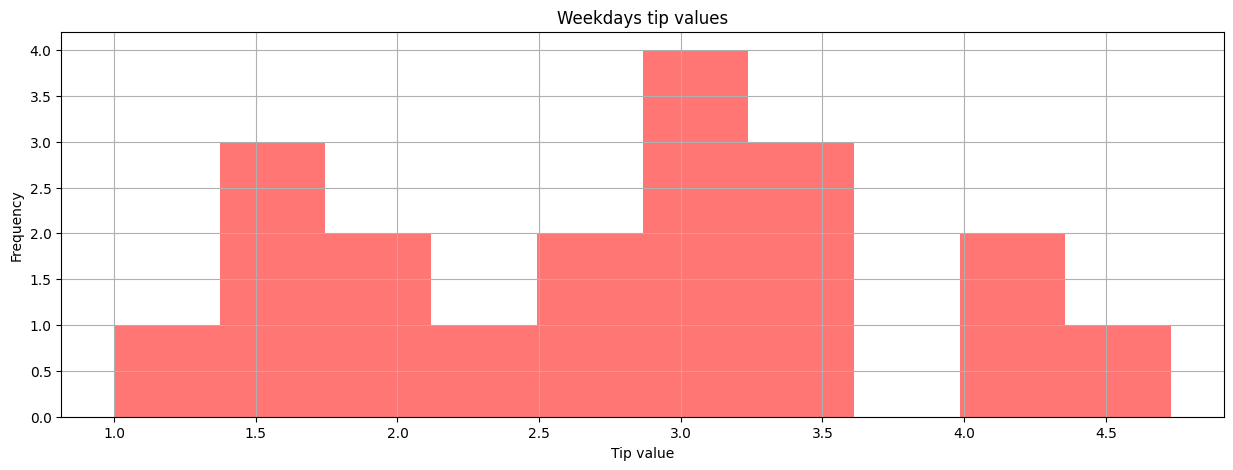

In [ ]:
# Weekdays histogram
plt.figure(figsize=(15, 5))
plt.hist(weekday_df['tip'], color='#ff7675', bins=10)

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Weekdays tip values')
plt.grid(True)
plt.show()

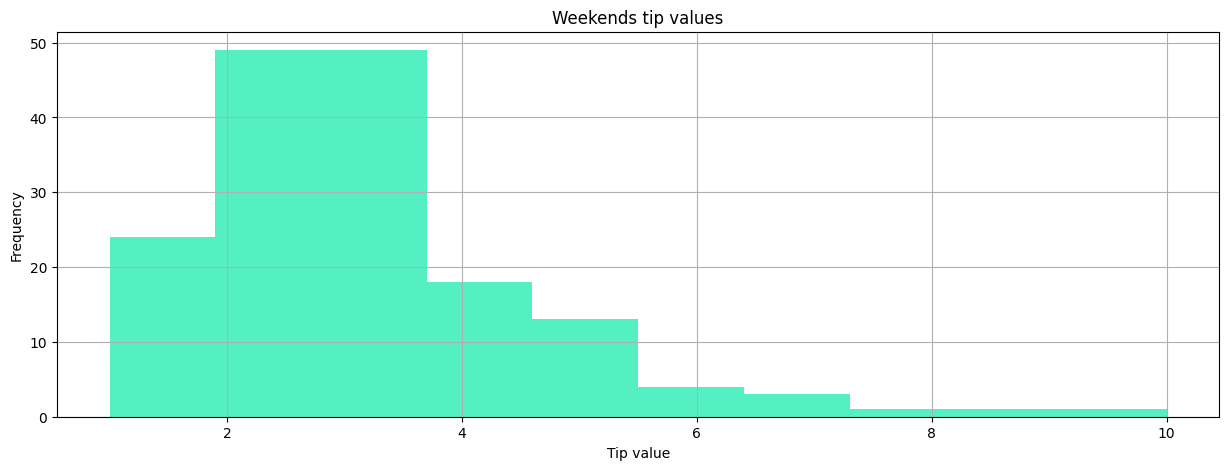

In [ ]:
# Weekends histogram
plt.figure(figsize=(15, 5))
plt.hist(weekend_df['tip'], color='#55efc4', bins=10)

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Weekends tip values')
plt.grid(True)
plt.show()

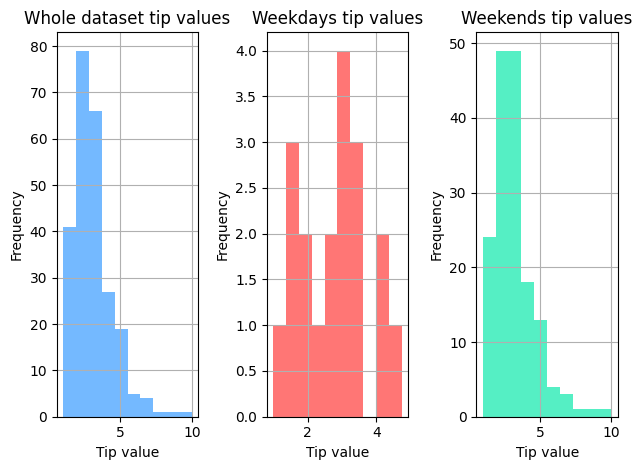

In [ ]:
# Create a single figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(6.4, 4.8))  # 640x480 in inches

# Whole dataset
axes[0].hist(df['tip'], color='#74b9ff', bins=10)
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Weekday dataset
axes[1].hist(weekday_df['tip'], color='#ff7675', bins=10)
axes[1].set_title('Weekdays tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Weekend dataset
axes[2].hist(weekend_df['tip'], color='#55efc4', bins=10)
axes[2].set_title('Weekends tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

**General conclusion**

The chart shows that tip values during weekdays tend to cluster within a narrower range, mostly between 2 and 4 dollars, with relatively lower frequency overall, suggesting smaller and less frequent tips. In contrast, weekend tips display a wider spread, ranging up to 10 dollars, with much higher frequency counts, especially around the 2–4 dollar range, indicating both larger customer volume and higher tipping amounts. This suggests that weekends not only bring in more customers but also result in higher and more varied tip values compared to weekdays.

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

In [ ]:
# Create a new dataframe dinner_df containing only info about dinners.
dinner_df = df[df['time'] == 'Dinner']
dinner_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
227,227,20.45,3.0,Male,No,Sat,Dinner,4
18,18,16.97,3.5,Female,No,Sun,Dinner,3
243,243,18.78,3.0,Female,No,Thur,Dinner,2
166,166,20.76,2.24,Male,No,Sun,Dinner,2
24,24,19.82,3.18,Male,No,Sat,Dinner,2


In [ ]:
# Create a new dataframe lunch_df containing only info about lunches.
lunch_df = df[df['time'] == 'Lunch']
lunch_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
126,126,8.52,1.48,Male,No,Thur,Lunch,2
145,145,8.35,1.5,Female,No,Thur,Lunch,2
226,226,10.09,2.0,Female,Yes,Fri,Lunch,2
82,82,10.07,1.83,Female,No,Thur,Lunch,1
81,81,16.66,3.4,Male,No,Thur,Lunch,2


In [ ]:
# Calculate measures of central tendency for dinners
dinner_tip_min = dinner_df['tip'].min()
dinner_tip_max = dinner_df['tip'].max()
dinner_tip_mean = dinner_df['tip'].mean()
dinner_tip_median = dinner_df['tip'].median()

# Make dataframe containing the measures of central tendency for dinners
# Make a list of values
dinner_values = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
# Round all the values to 4 decimal places
dinner_values = map(lambda x: round(x, 4), dinner_values)

# Make a dataframe from the list
dinner_mct = pd.DataFrame(dinner_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
dinner_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


In [ ]:
# Calculate measures of central tendency for lunches
lunch_tip_min = lunch_df['tip'].min()
lunch_tip_max = lunch_df['tip'].max()
lunch_tip_mean = lunch_df['tip'].mean()
lunch_tip_median = lunch_df['tip'].median()

# Make dataframe containing the measures of central tendency for lunches
# Make a list of values
lunch_values = [lunch_tip_min, lunch_tip_max, lunch_tip_mean, lunch_tip_median]
# Round all the values to 4 decimal places
lunch_values = map(lambda x: round(x, 4), lunch_values)

# Make a dataframe from the list
lunch_mct = pd.DataFrame(lunch_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
lunch_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


In [ ]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Dinners': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'Lunches': {'min': lunch_tip_min, 'max': lunch_tip_max, 'mean': lunch_tip_mean, 'median': lunch_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Dinners,Lunches
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


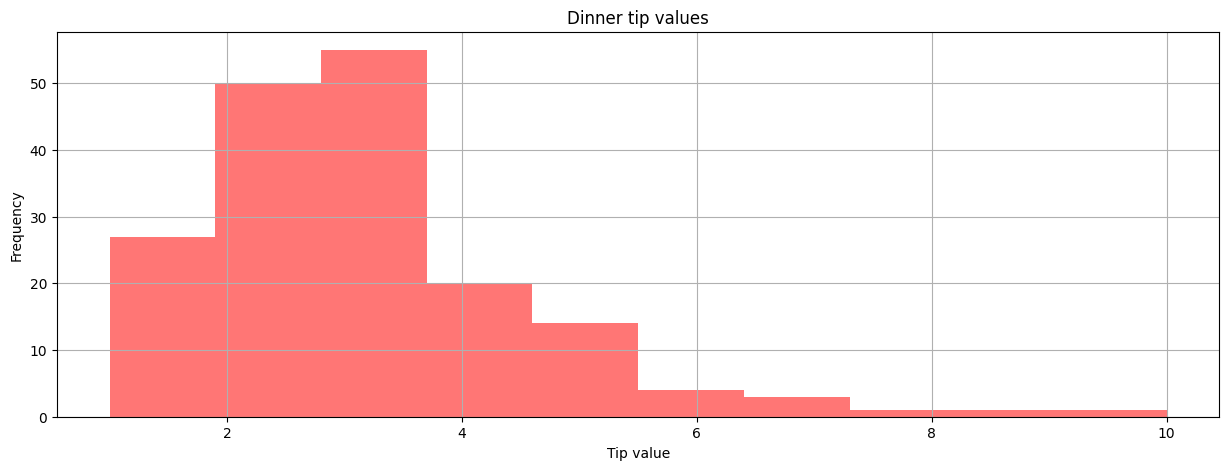

In [ ]:
# Dinners histogram
plt.figure(figsize=(15, 5))
plt.hist(dinner_df['tip'], color='#ff7675', bins=10)

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Dinner tip values')
plt.grid(True)
plt.show()

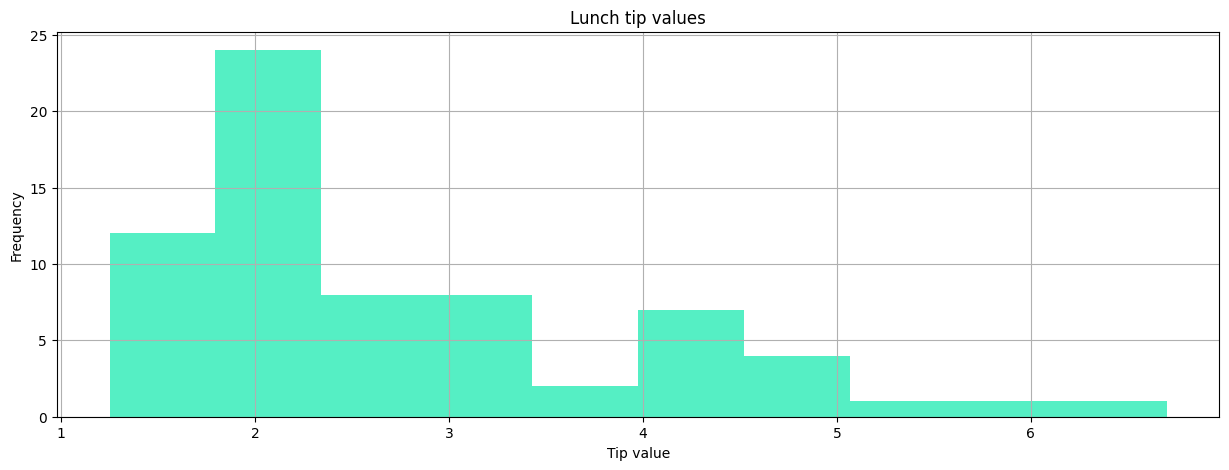

In [ ]:
# Lunch histogram
plt.figure(figsize=(15, 5))
plt.hist(lunch_df['tip'], color='#55efc4', bins=10)

plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Lunch tip values')
plt.grid(True)
plt.show()

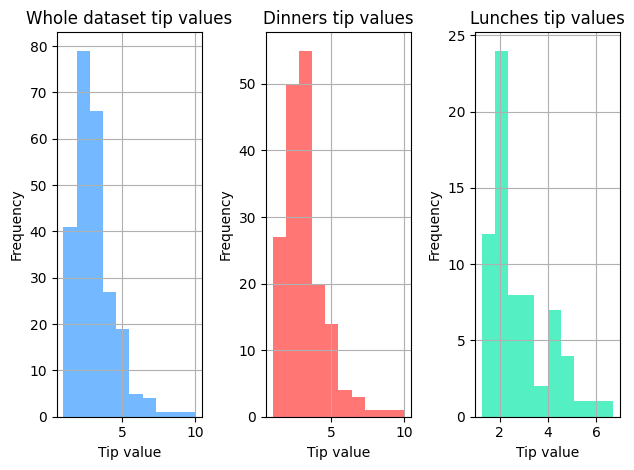

In [ ]:
# Create a single figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(6.4, 4.8))  # 640x480 in inches

# Whole dataset
axes[0].hist(df['tip'], color='#74b9ff', bins=10)
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)

# Dinner dataset
axes[1].hist(dinner_df['tip'], color='#ff7675', bins=10)
axes[1].set_title('Dinners tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].grid(True)

# Lunch dataset
axes[2].hist(lunch_df['tip'], color='#55efc4', bins=10)
axes[2].set_title('Lunches tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

**General conclusion**

The distribution shows that dinner tips are generally higher and more widely spread, with most tips clustering around 3–5 dollars and some reaching beyond 8 dollars. In contrast, lunch tips are lower and more concentrated, mostly between 1–3 dollars, with very few exceeding 5 dollars. Overall, customers tend to give larger and more varied tips during dinners compared to lunches.